# ✨ YAPAY ZEKA TOPLULUĞU | YAPAY ZEKA GELİŞİM KAMPI
## 🎖️ MIDDLE PLUS HAFTA 2

## Derin Yapay Sinir Ağları Modelleme

### DNN

* Derin doğrusal ağlar, birbirine bağlı birçok katmandan oluşur. Her katman, bir önceki katmandan gelen sinyalleri alır, bunları bir dizi matematiksel işlemden geçirir ve çıktıyı bir sonraki katmana iletir. Giriş katmanı, verileri kabul ederken, çıkış katmanı sonuçları üretir. Aradaki katmanlar gizli katmanlardır ve genellikle birçok nöron içerir.

* Her katmandaki nöronlar, bir ağırlık vektörü ve bir sapma (bias) ile ilişkilendirilmiştir. Giriş katmanındaki nöronlar, veri özelliklerini temsil eder. Gizli katmanlardaki nöronlar, giriş verisinin karmaşıklığını temsil eden özellikler ve desenler öğrenir. Çıkış katmanındaki nöronlar, sonuçları üretir.

* Her katmandaki nöronların çıktıları, bir aktivasyon fonksiyonu tarafından dönüştürülür. Aktivasyon fonksiyonları, nöronların ve dolayısıyla ağın esnekliğini ve öğrenme yeteneğini belirler. Yaygın olarak kullanılan aktivasyon fonksiyonları arasında ReLU (Rectified Linear Activation), sigmoid ve tanh fonksiyonları bulunur.

* Derin doğrusal ağlar, genellikle geri yayılım (backpropagation) adı verilen bir öğrenme algoritması kullanılarak eğitilir. Geri yayılım, ağın tahminlerinin gerçek etiketlerle karşılaştırılması ve ardından bu hatayı azaltmak için ağın ağırlıklarının ve sapmalarının ayarlanması sürecini içerir. Stokastik gradyan inişi (Stochastic Gradient Descent - SGD) ve türetilmiş optimizasyon algoritmaları (örneğin, Adam, RMSprop) sıkça kullanılan optimizasyon teknikleridir.

* Derin doğrusal ağlar, genellikle büyük miktarda veri kullanılarak eğitilir. Eğitim süreci, veri setini rastgele alt kümelerine (mini-batch) ayırma ve bu alt kümeleri kullanarak ağı tekrar tekrar eğitme işleminden oluşur. Eğitim süreci, ağın belirli bir kayıp fonksiyonunu (loss function) minimize etmek için ağırlıklarını ve sapmalarını ayarlamaya odaklanır.

* Derin doğrusal ağlar genellikle aşırı uyum (overfitting) eğilimindedir. Bu nedenle, regularizasyon teknikleri (örneğin, dropout, L1/L2 regularization) kullanılarak ağın genelleştirme yeteneği artırılabilir ve overfitting önlenir.


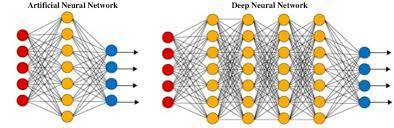

##### Kaynaklar

* https://www.youtube.com/watch?v=ZBnHoVMeeJE

* https://www.youtube.com/watch?v=B5MmXmMMuvI

* https://www.youtube.com/watch?v=aircAruvnKk

Basit bir DNN Modeli oluşturalım.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.autograd import Variable
import sklearn
import sklearn.model_selection
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score, log_loss
import seaborn as sns # data visualization library

news = pd.read_csv('02-OnlineNewsPopularity.csv')
X = news.iloc[:,2:-1]
column_names = list(X.columns.values)
N_FEATURES = len(column_names)
y = news.iloc[:,-1]
y = (y > 1400) # a news article is considered popular if it is shared more than 1400 times.

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=42, test_size=0.3)



def xNumpyToTensor(array):
    array = np.array(array, dtype=np.float32)
    return Variable(torch.from_numpy(array)).type(torch.FloatTensor)

def yNumpyToTensor(array):
    array = np.array(array.astype(int))
    return Variable(torch.from_numpy(array)).type(torch.FloatTensor)

x_tensor_train = xNumpyToTensor(x_train)
y_tensor_train = yNumpyToTensor(y_train)
x_tensor_test = xNumpyToTensor(x_test)
y_tensor_test = yNumpyToTensor(y_test)

# Neural Network parameters
DROPOUT_PROB = 0.9

LR = 0.001
MOMENTUM= 0.99
dropout = torch.nn.Dropout(p=1 - (DROPOUT_PROB))

hiddenLayer1Size=512
hiddenLayer2Size=int(hiddenLayer1Size/4)
hiddenLayer3Size=int(hiddenLayer1Size/8)
hiddenLayer4Size=int(hiddenLayer1Size/16)
hiddenLayer5Size=int(hiddenLayer1Size/32)

#Neural Network layers
linear1=torch.nn.Linear(N_FEATURES, hiddenLayer1Size, bias=True)
linear2=torch.nn.Linear(hiddenLayer1Size, hiddenLayer2Size)
linear3=torch.nn.Linear(hiddenLayer2Size, hiddenLayer3Size)
linear4=torch.nn.Linear(hiddenLayer3Size, hiddenLayer4Size)
linear5=torch.nn.Linear(hiddenLayer4Size, hiddenLayer5Size)
linear6=torch.nn.Linear(hiddenLayer5Size, 1)
sigmoid = torch.nn.Sigmoid()
threshold = nn.Threshold(0.5, 0)
tanh=torch.nn.Tanh()
relu=torch.nn.LeakyReLU()

#Neural network architecture
net = torch.nn.Sequential(linear1,nn.BatchNorm1d(hiddenLayer1Size),relu,
                          linear2,dropout,relu,
                          linear3,dropout,relu,
                          linear4,dropout,relu,
                          linear5,dropout,relu,
                          linear6,dropout,relu,
                          sigmoid
                          )

optimizer = torch.optim.Adam(net.parameters(), lr=LR,weight_decay=5e-3)
loss_func=torch.nn.BCELoss()
epochs = 200
all_losses = []

#Training in batches
for step in range(epochs):
    out = net(x_tensor_train)                 # input x and predict based on x
    cost = loss_func(out, y_tensor_train)
    optimizer.zero_grad()   # clear gradients for next train
    cost.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if step % 5 == 0:
        loss = cost.data
        all_losses.append(loss)
        print(step, cost.data.cpu().numpy())
        prediction = (net(x_tensor_test).data).float() # probabilities
        pred_y = prediction.cpu().numpy().squeeze()
        target_y = y_tensor_test.cpu().data.numpy()
        print ('LOG_LOSS={} '.format(log_loss(target_y, pred_y)))

#Evaluating the performance of the model
%matplotlib inline
plt.plot(all_losses)
plt.show()
pred_y = pred_y > 0.5
print('f1 score', f1_score(target_y, pred_y))
print('accuracy',accuracy_score(target_y, pred_y))
cm = confusion_matrix(target_y, pred_y)
sns.heatmap(cm, annot=True)

### CNN

##### Kaynaklar

* https://www.datacamp.com/tutorial/introduction-to-convolutional-neural-networks-cnns

* https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/

* https://medium.com/@tuncerergin/convolutional-neural-network-convnet-yada-cnn-nedir-nasil-calisir-97a0f5d34cad

* https://www.youtube.com/watch?v=QzY57FaENXg

* https://www.youtube.com/watch?v=HGwBXDKFk9I

* https://www.youtube.com/watch?v=SVeGBgI7MYg

Evrişimli Sinir Ağları (Convolutional Neural Networks - CNNs), özellikle görüntü tanıma ve sınıflandırma gibi görsel veri işleme problemleri için oldukça etkili olan derin öğrenme modelleridir. CNN'ler, özellikle 2B görüntülerdeki örüntüleri tespit etmek ve sınıflandırmak için tasarlanmıştır.

* **Evrişim Katmanları (Convolutional Layers):**

 * CNN'lerin temel yapı taşları evrişim katmanlarıdır. Bu katmanlar, girdi verisi üzerinde bir filtre (kernel) veya pencereyi kaydırarak farklı özellikleri tespit eder. Bu sayede, görüntülerdeki belirli özellikler (kenarlar, köşeler, dairesel yapılar vb.) tanınabilir.
 * Evrişim katmanları, filtrelerin (kernellerin) ağırlıklarını öğrenir ve bu ağırlıkları kullanarak girdi verisi üzerinde farklı konvolüsyon işlemleri uygular.

* **Aktivasyon Katmanları (Activation Layers):** Evrişim katmanlarından sonra, tipik olarak bir aktivasyon fonksiyonu uygulanır. Bu, ağın esnekliğini artırır ve doğrusal olmayan özelliklerin öğrenilmesine olanak tanır. ReLU (Rectified Linear Unit), tanh veya sigmoid gibi aktivasyon fonksiyonları sıkça kullanılır.

* **Havuzlama Katmanları (Pooling Layers):** Havuzlama (pooling) katmanları, ağın boyutunu azaltmak ve hesaplama karmaşıklığını azaltmak için kullanılır. Bu katmanlar, belirli bir bölgenin özelliklerini özetleyerek girdi boyutunu azaltır. Maksimum havuzlama ve ortalama havuzlama gibi farklı havuzlama teknikleri kullanılabilir.

* **Tam Bağlı Katmanlar (Fully Connected Layers):** Evrişim ve havuzlama katmanlarından sonra, genellikle tam bağlı (fully connected) katmanlar gelir. Bu katmanlar, özellik haritalarını düzleştirir ve ardından geleneksel yapay sinir ağı katmanları gibi davranır. Bu katmanlar, öğrenilen özelliklerin sınıflandırılması veya regresyon için kullanılır.

* **Öğrenme ve Geriye Yayılma (Learning and Backpropagation):** CNN'ler genellikle geriye yayılım (backpropagation) algoritması kullanılarak eğitilir. Bu süreçte, modelin çıkışları ile gerçek etiketler arasındaki farka göre bir kayıp (loss) hesaplanır ve bu kayıp geriye doğru katmanlara yayılarak ağın parametreleri güncellenir.

* **Veri Artırma (Data Augmentation):** CNN'ler genellikle veri artırma teknikleri kullanılarak eğitilir. Veri artırma, eğitim veri setindeki örneklerin çeşitliliğini artırmak için yapılır. Örneğin, görüntülerin döndürülmesi, yansıtılması, kaydırılması vb. gibi dönüşümler uygulanabilir.

* **Uygulamalar:** CNN'ler, görüntü sınıflandırma, nesne tanıma, yüz tanıma, tıbbi görüntü analizi, otonom araçlar ve daha birçok alanda başarılı bir şekilde kullanılmıştır. Özellikle, ImageNet gibi büyük veri kümelerindeki performanslarıyla dikkat çekmişlerdir.

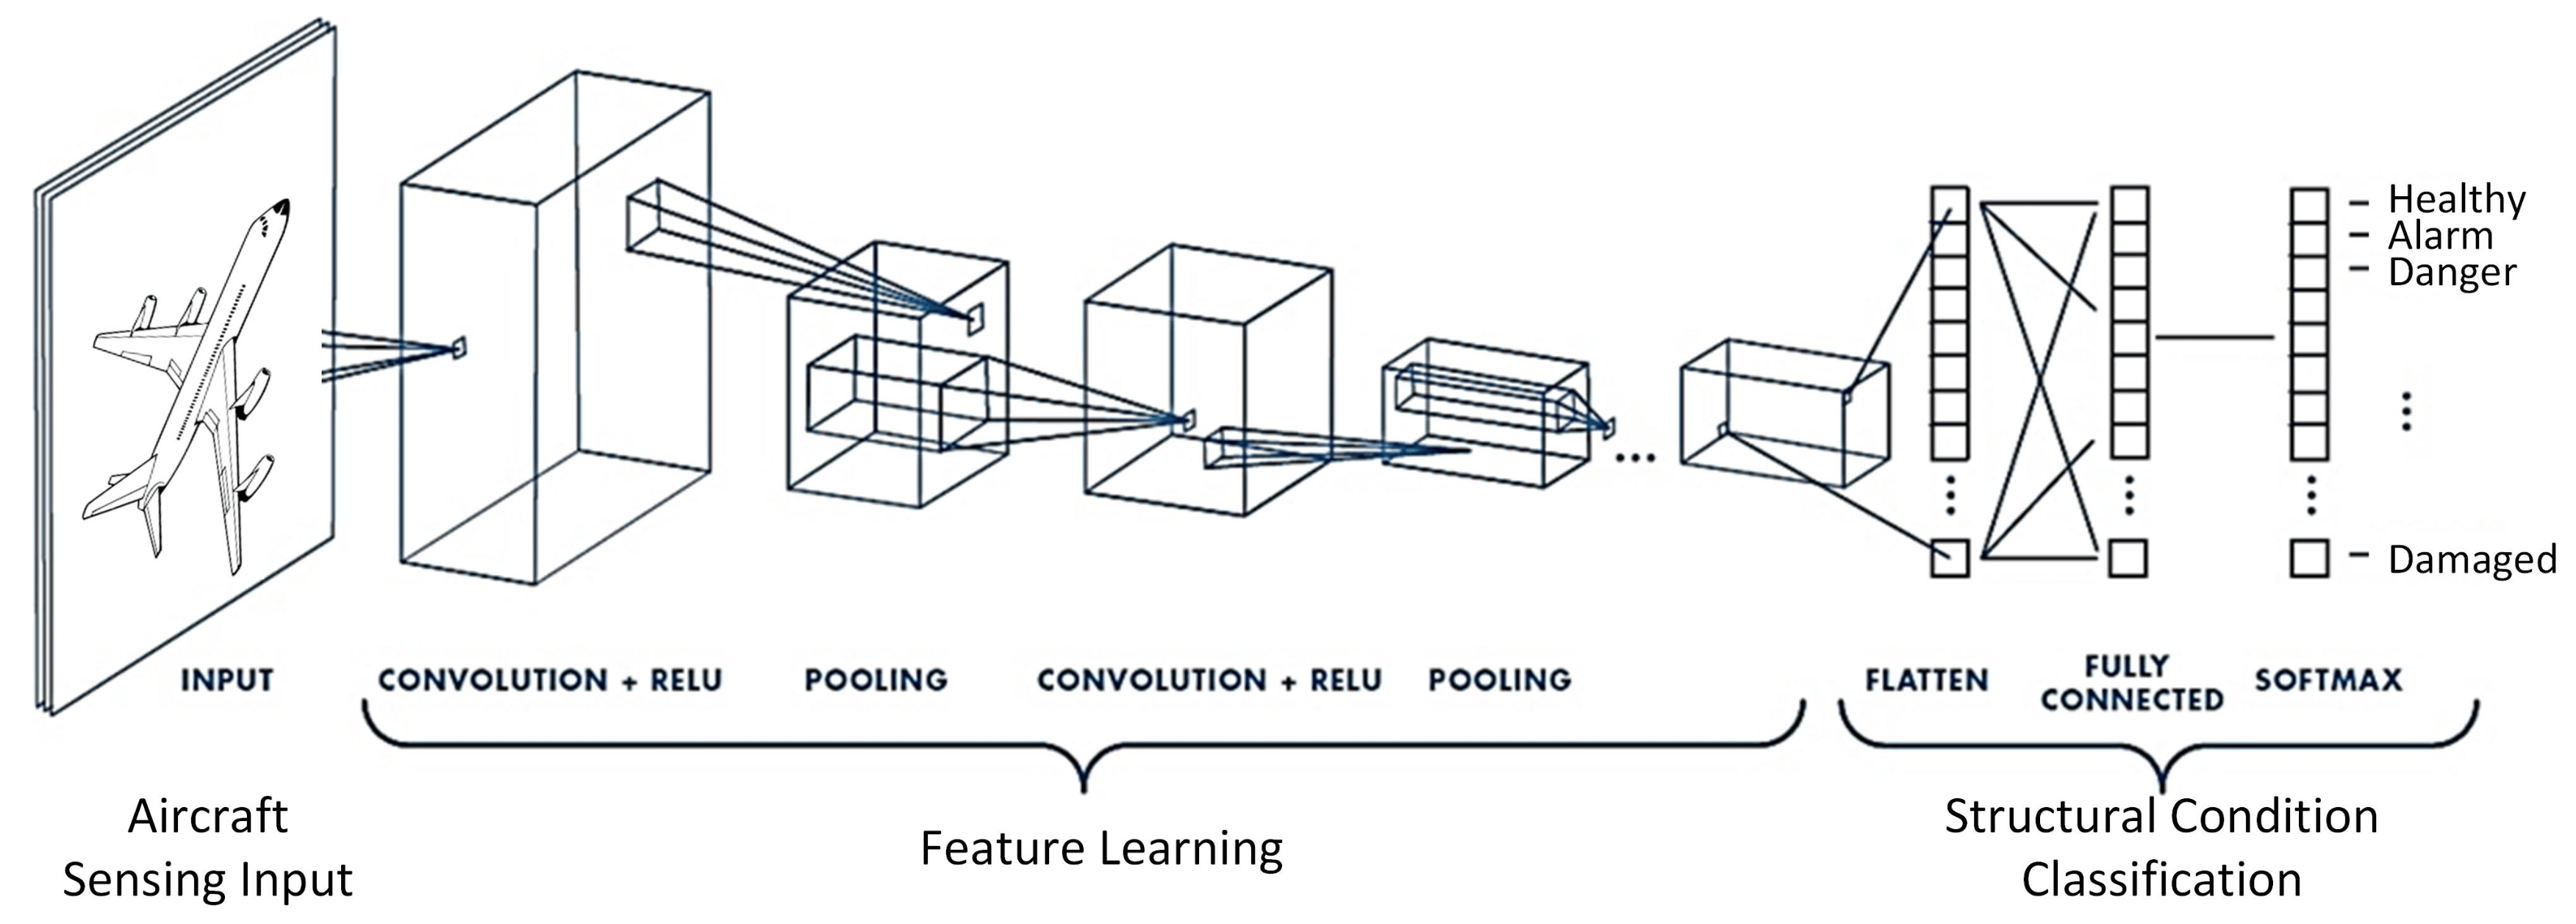

Linkteki kaynağı kullanarak uygulamayı yapınız. https://www.analyticsvidhya.com/blog/2019/10/building-image-classification-models-cnn-pytorch/

### RNN

##### Kaynaklar

* https://stanford.edu/~shervine/l/tr/teaching/cs-230/cheatsheet-recurrent-neural-networks

* https://medium.com/@hamzaerguder/recurrent-neural-network-nedir-bdd3d0839120

* https://medium.com/deep-learning-turkiye/rnn-nedir-nas%C4%B1l-%C3%A7al%C4%B1%C5%9F%C4%B1r-9e5d572689e1

* https://www.youtube.com/watch?v=AHybjSLXlV8

* https://www.youtube.com/watch?v=AsNTP8Kwu80 

* https://www.youtube.com/watch?v=uWiBr1YXtWY

* https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn


Rekürrent Sinir Ağları (Recurrent Neural Networks - RNNs), zaman serileri, doğal dil işleme ve diğer sıralı verilerle çalışmak için tasarlanmış derin öğrenme modelleridir. RNN'ler, belirli bir girdi dizisini alır ve bu dizideki zaman bağımlılıklarını modellemek için içsel bellekleri aracılığıyla geri besleme sağlar.

* **Temel Yapı:** RNN'ler, giriş verisini sıralı olarak işler. Her adımda, RNN bir giriş vektörünü (örneğin, bir kelime vektörü veya bir zaman serisi noktası) alır ve önceki adımlardaki iç durumunu kullanarak bir çıktı ve yeni bir iç durum üretir. Bu geri besleme mekanizması, RNN'leri zaman serileri ve sıralı verilerle çalışmak için ideal hale getirir.

* **Hücre (Cell) Yapısı:** RNN'nin temel yapı taşı, hücre (cell) olarak adlandırılır. Bir RNN hücresi, girdi vektörünü alır ve bir çıktı üretirken aynı zamanda bir dahili durumu (hidden state) korur. Bu dahili durum, RNN'nin geçmiş bilgileri hatırlamasını ve zaman bağımlılıklarını modellemesini sağlar.

  Her adımda, RNN'nin dahili durumu, mevcut girdi ve önceki adımdaki dahili durum ile güncellenir.

* **Geri Besleme (Recurrence):** RNN'lerin ana özelliği, her adımda çıktıyı ve dahili durumu bir sonraki adıma iletmeleridir. Bu geri besleme mekanizması, RNN'nin sıralı verilerdeki zaman bağımlılıklarını modellemesini sağlar. Bu sayede, RNN'ler, önceki adımlardaki bilgileri kullanarak gelecek adımlardaki tahminleri yapabilir.

* **Eğitim ve Geriye Yayılma (Training and Backpropagation):** RNN'ler genellikle geriye yayılım (backpropagation) algoritması kullanılarak eğitilir. Bu süreçte, RNN'nin çıkışları ile gerçek etiketler arasındaki farka göre bir kayıp (loss) hesaplanır ve bu kayıp geriye doğru katmanlara yayılarak ağın parametreleri güncellenir.

  Ancak, RNN'lerin eğitimi sırasında karşılaşılan birçok zorluk vardır, özellikle de uzun vadeli bağımlılıkları yakalamak için. Bu nedenle, bazı gelişmiş RNN varyantları, bu zorlukları ele almak için tasarlanmıştır.

* **LSTM ve GRU Hücreleri:** Uzun ve kısa vadeli bellek (Long Short-Term Memory - LSTM) ve Gated Recurrent Unit (GRU) gibi özel RNN hücreleri, RNN'lerin uzun vadeli bağımlılıkları daha iyi yakalamasına yardımcı olmak için tasarlanmıştır. Bu hücreler, normal RNN hücrelerine göre daha gelişmiş bir iç yapısıyla birlikte gelir.

* **Uygulamalar:** RNN'ler, doğal dil işleme (metin sınıflandırma, dil modellemesi, makine çevirisi vb.), zaman serisi tahmini, duyarlılığın analizi, müzik oluşturma gibi birçok alanda kullanılmıştır. Özellikle, LSTM ve GRU gibi gelişmiş RNN varyantları, bu alanlarda genellikle daha iyi performans gösterir.

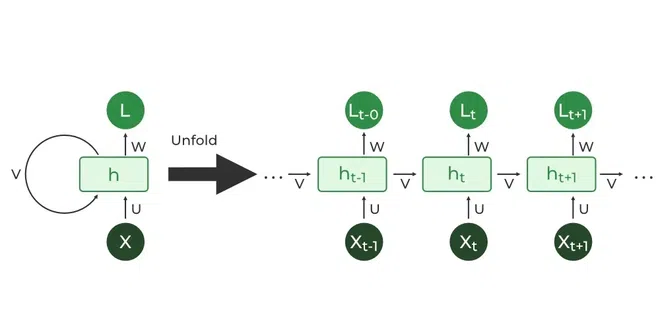

Uygulamayı yapınız: https://www.youtube.com/watch?v=Gl2WXLIMvKA

### GAN

Üreteç ve Ayıracı (Generative Adversarial Networks - GANs), derin öğrenme alanında oldukça güçlü ve yenilikçi bir modeldir. GAN'lar, gerçekçi ve inandırıcı veri üretmek için birbirleriyle rekabet eden iki ağdan oluşur.

* **Temel Yapı:** GAN'lar, iki temel bileşenden oluşur: Üreteç (Generator) ve Ayıracı (Discriminator). Bu iki ağ, birbirleriyle karşı karşıya gelir ve birbirlerine karşı eğitilirler.

 * Üreteç, rastgele gürültüden (genellikle bir normal dağılımdan) gelen girdi vektörlerini alır ve gerçekçi görünen veri örnekleri üretmeye çalışır. Örneğin, bir üreteç, gerçekçi görünen resimler üretmeye çalışabilir.
 * Ayıracı, gelen veri örneklerini (hem gerçek hem de sahte olanları) alır ve bunları gerçek veya sahte olarak sınıflandırmaya çalışır. Yani, ayıracı, üreteç tarafından üretilen sahte verileri gerçek verilerden ayırt etmeye çalışır.

* **Eğitim Süreci:** GAN'ların eğitimi, üreteç ve ayıracı arasındaki bir oyun gibidir. Eğitim sırasında, üreteç ve ayıracı birbirine karşı rekabet eder ve birbirlerini geliştirmeye çalışırlar. Eğitim süreci genellikle iki aşamalı bir döngü içinde gerçekleşir:
 * Üreteç, rastgele gürültüden örnekler üretir ve bu örnekleri ayıracıya sunar.
 * Ayıracı, gerçek ve sahte örnekleri sınıflandırır ve geribildirim verir. Daha sonra, bu geribildirim kullanılarak üreteç güncellenir.
 * Amacı, üretecinin gerçek verilere benzer sahte veriler üretmesini sağlamak ve ayıracının sahte verileri gerçeklerden ayırt etmesini zorlaştırmaktır.

* **Kayıp Fonksiyonları:** GAN'ların eğitimi, iki kayıp fonksiyonunun minimizasyonu üzerine odaklanır: üreteç için bir kayıp fonksiyonu ve ayıracı için bir kayıp fonksiyonu.
 * Üreteç için kayıp fonksiyonu, üretilen verilerin ayıracı tarafından gerçek olarak yanlış sınıflandırılmasını maksimize etmeye çalışır.
 * Ayıracı için kayıp fonksiyonu, gerçek verilerin gerçek olarak ve üretilen verilerin sahte olarak doğru şekilde sınıflandırılmasını maksimize etmeye çalışır.

* **Uygulamalar:** GAN'lar, gerçekçi görüntüler, videolar, metinler, müzikler gibi çeşitli veri türlerini üretmek için kullanılabilir. Özellikle, resim sentezi, yüz üretme, steganografi, veri artırma gibi alanlarda başarılı sonuçlar vermişlerdir. GAN'lar ayrıca, veri setlerinin dengesizliklerini düzeltmek ve nadir sınıfları artırmak için kullanılabilir. Örneğin, tıbbi görüntülerde nadir hastalıkların tespiti için kullanılabilirler.

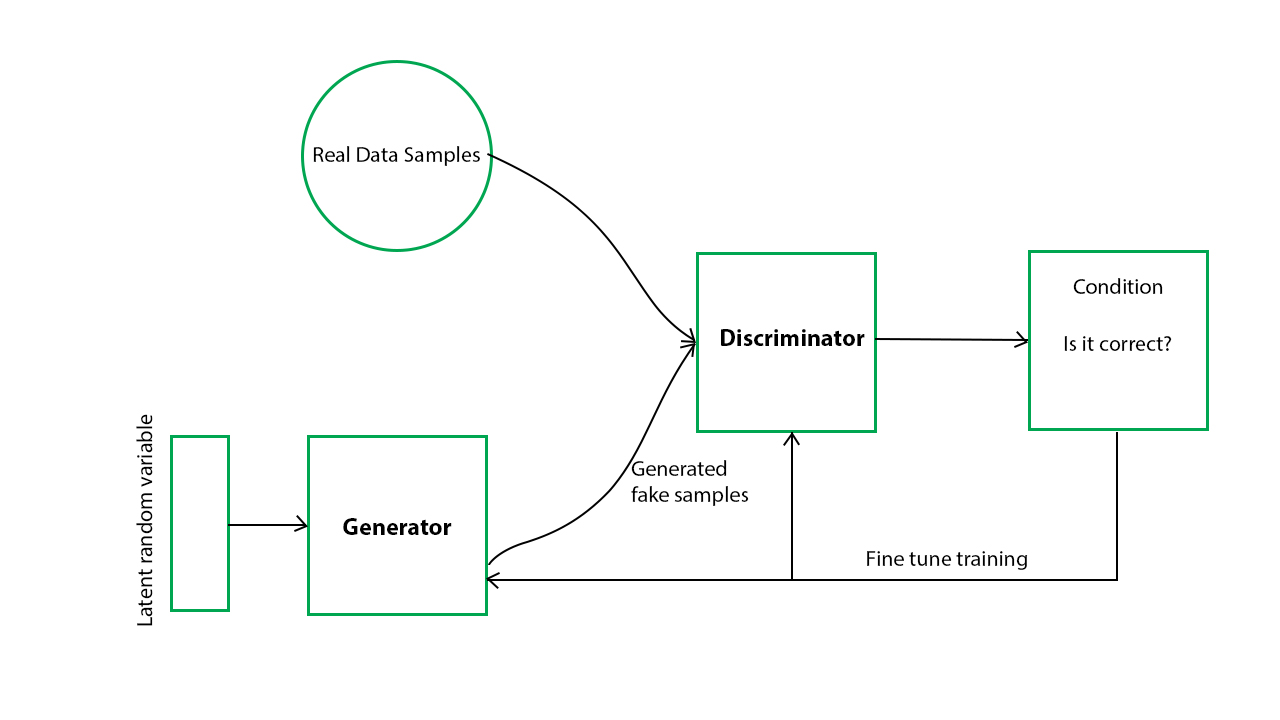

##### Kaynaklar

* https://cihanongun.medium.com/generative-adversarial-networks-gan-nedir-5cc6a48a6870

* https://www.youtube.com/watch?v=TpMIssRdhco&pp=ygUDR0FO

* https://www.youtube.com/watch?v=8L11aMN5KY8

# Okuma Köşesi

RNN, CNN, DNN Nedir?
RNN (Recurrent Neural Network - Tekrarlayan Sinir Ağları), özellikle sıralı verilerle çalışmak için tasarlanmış bir sinir ağı türüdür. Örneğin, bir cümleyi işlerken bir önceki kelimeyi hatırlayıp sonraki kelimeyi tahmin etmek gibi. Bu özelliği, metin tamamlama, çeviri veya konuşma tanıma gibi işlerde kullanılmasını sağlar. Ancak, uzun sıralı verilerde bazen bilgiyi unutabildiği için sınırlı kalabilir.

CNN (Convolutional Neural Network - Evrişimli Sinir Ağları), görüntü ve video gibi verileri işlemek için özelleşmiştir. Resimlerdeki kenarlar, şekiller veya dokular gibi özellikleri otomatik olarak öğrenir. Bu nedenle, yüz tanıma, nesne algılama veya görüntü sınıflandırma gibi alanlarda sıkça kullanılır. CNN'ler, resimlerdeki önemli detayları yakalayarak yüksek performans gösterir.

DNN (Deep Neural Network - Derin Sinir Ağları), genel amaçlı problemler için kullanılan çok katmanlı sinir ağlarıdır. Veriler arasındaki karmaşık ilişkileri öğrenmek için tasarlanmıştır. Örneğin, bir müşterinin alışveriş alışkanlıklarına göre ürün önerisi yapmak veya bir veri setindeki desenlere dayanarak tahminlerde bulunmak gibi işlerde kullanılır. DNN'ler, geniş bir kullanım alanına sahiptir ve derin öğrenmenin temel yapı taşlarından biridir.

### Yapay Zekalar Nasıl Eğitilir?

Yapay zeka eğitimi, veri toplama süreciyle başlayan karmaşık ve çok adımlı bir süreçtir. Modelin performansı ve başarısı, kullanılan verinin kalitesi, çeşitliliği ve doğruluğuna doğrudan bağlıdır. Veri toplama işlemi, manuel veri girişi, web kazıma (web scraping), API’ler aracılığıyla veri çekme veya hazır veri havuzlarından yararlanma gibi farklı yöntemlerle gerçekleştirilebilir. Ancak, toplanan veriler genellikle ham haldedir ve kullanıma hazır değildir. Bu nedenle, verilerin temizlenmesi, eksik veya hatalı kısımların düzeltilmesi ve tutarlı bir formata getirilmesi gerekir.

Veri temizleme aşamasından sonra, verilerin etiketlenmesi önemli bir adımdır. Etiketleme, verilerin anlamlı hale getirilmesini ve modelin öğrenme sürecini kolaylaştırmayı sağlar. Bu işlem manuel olarak yapılabileceği gibi, yarı otomatik veya tam otomatik yöntemlerle de gerçekleştirilebilir. Ayrıca, veri artırma (data augmentation) teknikleri kullanılarak mevcut veri seti çeşitlendirilebilir ve modelin genelleme yeteneği artırılabilir. Bu, özellikle sınırlı veriye sahip olduğunuz durumlarda modelin daha iyi performans göstermesine yardımcı olur.

Veri seti, modelin eğitimi, doğrulama ve test aşamaları için genellikle üç ana bölüme ayrılır: eğitim seti, doğrulama seti ve test seti. Eğitim seti, modelin öğrenmesi için kullanılırken, doğrulama seti hiperparametre ayarlamaları ve model seçimi için kullanılır. Test seti ise modelin nihai performansını değerlendirmek için ayrılır. Bu bölümleme, modelin aşırı öğrenme (overfitting) veya eksik öğrenme (underfitting) gibi sorunlarla karşılaşmasını engellemeye yardımcı olur.

Önyargıyı (bias) azaltmak ve modelin adil olmasını sağlamak için veri setinin dengelenmesi önemlidir. Az temsil edilen grupların veri setinde yeterince yer alması, modelin bu gruplar üzerinde de doğru tahminler yapmasını sağlar. Ayrıca, modelin etik ve güvenli olması için veri gizliliği ve güvenlik önlemleri büyük önem taşır. Kişisel verilerin korunması ve veri ihlallerinin önlenmesi, yapay zeka sistemlerinin güvenilirliği açısından kritiktir.

Modelin performansını artırmak için hiperparametre ayarlama işlemi gerçekleştirilir. Bu adım, modelin öğrenme hızı, karmaşıklığı ve diğer parametrelerinin optimize edilmesini içerir. Model eğitildikten sonra, doğruluk (accuracy), kesinlik (precision), duyarlılık (recall) ve F1 skoru gibi metrikler kullanılarak değerlendirilir. Bu metrikler, modelin ne kadar iyi performans gösterdiğini anlamak için kullanılır.

Son aşamada, model üretim ortamına dağıtılır ve gerçek dünya verileri üzerinde performansı izlenir. Modelin zaman içinde performansını koruması için düzenli olarak güncellenmesi ve yeni verilerle yeniden eğitilmesi gerekebilir. Yapay zeka eğitimi, sürekli gelişen ve iyileştirilmesi gereken bir süreçtir. Gelecekte, bu süreçlerin daha otomatik hale gelmesi, etik standartların daha da geliştirilmesi ve kişiselleştirilmiş modellerin yaygınlaşması beklenmektedir. Bu gelişmeler, yapay zekanın daha geniş alanlarda ve daha etkili bir şekilde kullanılmasını sağlayacaktır.


- “Artificial Intelligence and the Future of Humanity”(Yapay Zekâ ve İnsanlığın Geleceği)

## 🎯 Görevler: Yaptığınız uygulamaların kodlarını yükleyiniz.

Uygulamayı yapınız: https://www.youtube.com/watch?v=_pIMdDWK5sc